In [122]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [123]:
os.listdir('../data')

['core_1100_dtw_agemodel.csv',
 'LR04stack.csv',
 'core_1100.csv',
 'core_1100_d13C_pl.csv',
 'core_1150_d13C_pl.csv',
 'core_1100_d18O_pl.csv',
 'core_1150_d13C_bulk.csv',
 'core_1100_aragonite.csv',
 '.ipynb_checkpoints',
 'core_1150_d18O_bulk.csv',
 'core_1150.csv',
 'core_1150_aragonite.csv',
 'core_1150_d18O_pl.csv']

In [124]:
[x for x in os.listdir('../out') if x.endswith('.csv')]

['d18O_pl_LR04stack_core_1100_out.csv',
 'd18O_pl_core_1100_dtw_agemodel_core_1150_out.csv',
 'd18O_pl_LR04stack_core_1150_out.csv']

In [125]:
df1 = pd.read_csv("../data/LR04stack.csv")

In [126]:
df1.columns

Index(['time', 'd18O'], dtype='object')

In [127]:
df1 = df1[df1['time'] <= 280]

In [128]:
df2 = pd.read_csv("../out/d18O_pl_core_1100_dtw_agemodel_core_1150_out.csv")

In [129]:
df2.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [130]:
df2.head(22)

,depth_m,d18O_pl,dtw_time [kyrs B.P.]
0,0.01,-1.891,0
1,0.06,-1.525,1
2,0.11,-2.421,2
3,0.16,-2.422,2
4,0.21,-1.562,2
5,0.26,-1.293,2
6,0.31,-1.892,2
7,0.36,-1.697,2
8,0.41,-2.114,2
9,0.46,-1.534,2


In [131]:
# Add 14C ages and interpolate
df2.at[8, 'dtw_time [kyrs B.P.]'] = 5.120
df2.at[20, 'dtw_time [kyrs B.P.]'] = 9.600

In [132]:
fill1 = np.linspace(0, 5.12, 8, endpoint=False)
for x in range(1,8):
    df2.at[x, 'dtw_time [kyrs B.P.]'] = fill1[x]

In [133]:
fill2 = np.linspace(5.12, 9.6, 12, endpoint=False)
for x in range(1, 12):
    df2.at[x + 8, 'dtw_time [kyrs B.P.]'] = fill2[x]

In [134]:
df3 = pd.read_csv("../out/d18O_pl_LR04stack_core_1100_out.csv")

In [135]:
df3.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [136]:
df4 = pd.read_csv("../out/d18O_pl_LR04stack_core_1150_out.csv")

In [137]:
df4.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]', 'sed_rates [m/kyr]'], dtype='object')

In [156]:
# Add 14C ages and interpolate
df4.at[8, 'dtw_time [kyrs B.P.]'] = 5.120
df4.at[20, 'dtw_time [kyrs B.P.]'] = 9.600

In [157]:
fill1 = np.linspace(0, 5.12, 8, endpoint=False)
for x in range(1,8):
    df4.at[x, 'dtw_time [kyrs B.P.]'] = fill1[x]

In [160]:
fill2 = np.linspace(5.12, 9.6, 12, endpoint=False)
for x in range(1, 12):
    df4.at[x + 8, 'dtw_time [kyrs B.P.]'] = fill2[x]

In [161]:
df4.head(22)

,depth_m,d18O_pl,dtw_time [kyrs B.P.],sed_rates [m/kyr]
0,0.01,-1.891,0.000000,0.0000
1,0.06,-1.525,0.640000,0.0100
2,0.11,-2.421,1.280000,0.0125
3,0.16,-2.422,1.920000,0.0500
4,0.21,-1.562,2.560000,0.0500
5,0.26,-1.293,3.200000,0.0500
6,0.31,-1.892,3.840000,0.0500
7,0.36,-1.697,4.480000,0.0500
8,0.41,-2.114,5.120000,0.0500
9,0.46,-1.534,5.493333,0.0500


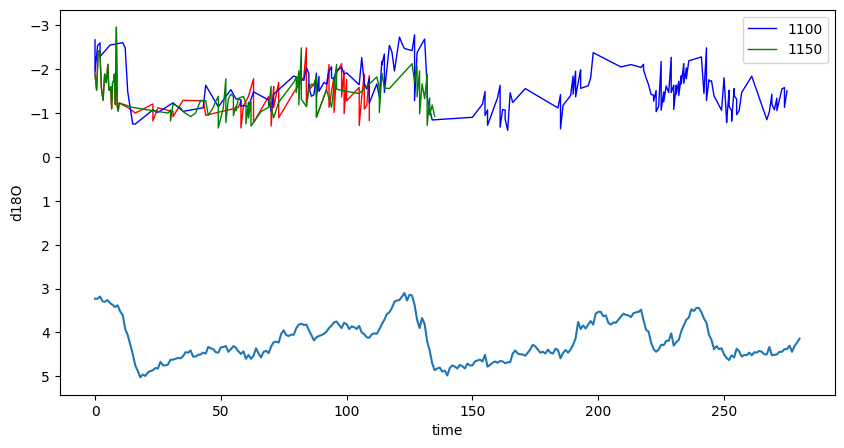

In [258]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,5)
sns.lineplot(ax=ax, x='time', y='d18O', data=df1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df2, estimator=None, color='red', linewidth=1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df3, estimator=None, color='blue', linewidth=1, label='1100')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df4, estimator=None, color='green', linewidth=1, label='1150')
ax.invert_yaxis()


In [163]:
f.savefig('../out/fig05.svg')

In [140]:
tmp1 = pd.read_csv("../data/core_1150_aragonite.csv", skip_blank_lines=True)

In [141]:
tmp2 = pd.read_csv("../data/core_1150_d18O_pl.csv", skip_blank_lines=True)

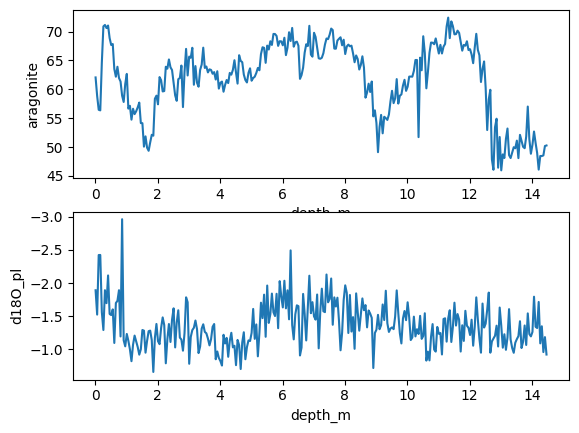

In [142]:
fig, ax = plt.subplots(2, 1)
sns.lineplot(ax=ax[0], x=tmp1['depth_m'], y=tmp1['aragonite'])
sns.lineplot(ax=ax[1], x=tmp2['depth_m'], y=tmp2['d18O_pl'])
ax[1].invert_yaxis()

In [143]:
fig.savefig('../out/tmp.png', dpi=300)

## SEDIMENTATION RATES

#### 1100

In [187]:
df3.head(11)

,depth_m,d18O_pl,dtw_time [kyrs B.P.]
0,0.01,-1.924,0.0
1,0.06,-2.673,0.0
2,0.11,-2.551,0.0
3,0.16,-2.537,1.0
4,0.21,-2.290,2.0
5,0.26,-2.603,2.0
6,0.31,-2.554,6.0
7,0.36,-2.608,11.0
8,0.41,-2.490,12.0
9,0.46,-1.489,13.0


In [189]:
0.5/15 * 100

3.3333333333333335

In [172]:
len(df3['depth_m'])

282

In [213]:
rates_1100 = dict()
previous_age = list()
for num, i in enumerate(np.arange(0, 281, 10)):
    
    depth =  df3.at[i, 'depth_m']
    age = df3.at[i, 'dtw_time [kyrs B.P.]']
      
    if len(previous_age) <= 0:
        rates_1100[num] = [depth, age, 0.0]
        print('Rate is 0')
    else:    
        time_delta = age - previous_age[-1]
        if time_delta <= 0:
            rate = 0.0
        else:
            rate = 0.5 / time_delta * 100
        rates_1100[num] = [depth, age, round(rate, 1)]
        
    previous_age.append(age)
    

Rate is 0


In [217]:
rates_1100

{0: [0.01, 0.0, 0.0],
 1: [0.51, 15.0, 3.3],
 2: [1.01, 56.0, 1.2],
 3: [1.51, 71.0, 3.3],
 4: [2.01, 88.0, 2.9],
 5: [2.51, 89.0, 50.0],
 6: [3.01, 98.0, 5.6],
 7: [3.51, 109.0, 4.5],
 8: [4.01, 114.0, 10.0],
 9: [4.61, 121.0, 7.1],
 10: [5.11, 132.0, 4.5],
 11: [5.61, 155.0, 2.2],
 12: [6.11, 161.0, 8.3],
 13: [6.61, 185.0, 2.1],
 14: [7.11, 191.0, 8.3],
 15: [7.61, 193.0, 25.0],
 16: [8.11, 218.0, 2.0],
 17: [8.61, 223.0, 10.0],
 18: [9.11, 226.0, 16.7],
 19: [9.61, 229.0, 16.7],
 20: [10.11, 229.0, 0.0],
 21: [10.61, 230.0, 50.0],
 22: [11.11, 230.0, 0.0],
 23: [11.61, 232.0, 25.0],
 24: [12.11, 235.0, 16.7],
 25: [12.61, 244.0, 5.6],
 26: [13.11, 253.0, 5.6],
 27: [13.61, 268.0, 3.3],
 28: [14.11, 274.0, 8.3]}

In [233]:
rates_1100 = pd.DataFrame(rates_1100).transpose()

In [234]:
rates_1100 = rates_1100.rename(columns={0:'depth', 1:'age', 2:'sed-rate'})

#### 1150

In [227]:
len(df4)

290

In [228]:
rates_1150 = dict()
previous_age = list()
for num, i in enumerate(np.arange(0, 290, 10)):
    
    depth =  df4.at[i, 'depth_m']
    age = df4.at[i, 'dtw_time [kyrs B.P.]']
      
    if len(previous_age) <= 0:
        rates_1150[num] = [depth, age, 0.0]
        print('Rate is 0')
    else:    
        time_delta = age - previous_age[-1]
        if time_delta <= 0:
            rate = 0.0
        else:
            rate = 0.5 / time_delta * 100
        rates_1150[num] = [depth, age, round(rate, 1)]
        
    previous_age.append(age)

Rate is 0


In [229]:
rates_1150

{0: [0.01, 0.0, 0.0],
 1: [0.51, 5.866666666666667, 8.5],
 2: [1.01, 9.6, 13.4],
 3: [1.51, 42.0, 1.5],
 4: [2.01, 51.0, 5.6],
 5: [2.51, 52.0, 50.0],
 6: [3.01, 52.0, 0.0],
 7: [3.51, 55.0, 16.7],
 8: [4.01, 60.0, 10.0],
 9: [4.51, 62.0, 25.0],
 10: [5.01, 70.0, 6.2],
 11: [5.51, 81.0, 4.5],
 12: [6.01, 82.0, 50.0],
 13: [6.51, 87.0, 10.0],
 14: [7.01, 100.0, 3.8],
 15: [7.51, 128.0, 1.8],
 16: [8.01, 129.0, 50.0],
 17: [8.51, 129.0, 0.0],
 18: [9.01, 132.0, 16.7],
 19: [9.51, 132.0, 0.0],
 20: [10.01, 132.0, 0.0],
 21: [10.51, 132.0, 0.0],
 22: [11.01, 132.0, 0.0],
 23: [11.51, 132.0, 0.0],
 24: [12.01, 132.0, 0.0],
 25: [12.51, 132.0, 0.0],
 26: [13.01, 132.0, 0.0],
 27: [13.51, 132.0, 0.0],
 28: [14.01, 132.0, 0.0]}

In [230]:
rates_1150 = pd.DataFrame(rates_1150).transpose()
rates_1150 = rates_1150.rename(columns={0:'depth', 1:'age', 2:'sed-rate'})

In [232]:
rates_1100

{0: [0.01, 0.0, 0.0],
 1: [0.51, 15.0, 3.3],
 2: [1.01, 56.0, 1.2],
 3: [1.51, 71.0, 3.3],
 4: [2.01, 88.0, 2.9],
 5: [2.51, 89.0, 50.0],
 6: [3.01, 98.0, 5.6],
 7: [3.51, 109.0, 4.5],
 8: [4.01, 114.0, 10.0],
 9: [4.61, 121.0, 7.1],
 10: [5.11, 132.0, 4.5],
 11: [5.61, 155.0, 2.2],
 12: [6.11, 161.0, 8.3],
 13: [6.61, 185.0, 2.1],
 14: [7.11, 191.0, 8.3],
 15: [7.61, 193.0, 25.0],
 16: [8.11, 218.0, 2.0],
 17: [8.61, 223.0, 10.0],
 18: [9.11, 226.0, 16.7],
 19: [9.61, 229.0, 16.7],
 20: [10.11, 229.0, 0.0],
 21: [10.61, 230.0, 50.0],
 22: [11.11, 230.0, 0.0],
 23: [11.61, 232.0, 25.0],
 24: [12.11, 235.0, 16.7],
 25: [12.61, 244.0, 5.6],
 26: [13.11, 253.0, 5.6],
 27: [13.61, 268.0, 3.3],
 28: [14.11, 274.0, 8.3]}

<Axes: xlabel='age', ylabel='sed-rate'>

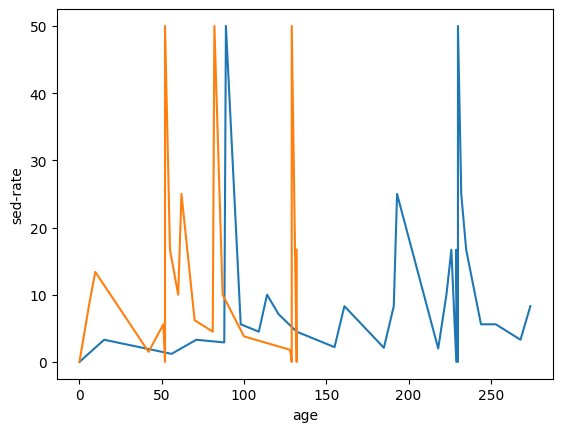

In [237]:
fig, ax = plt.subplots(1,1)
sns.lineplot(ax=ax, x='age', y='sed-rate', data=rates_1100, estimator=None)
sns.lineplot(ax=ax, x='age', y='sed-rate', data=rates_1150, estimator=None)

In [238]:
fig.savefig('../out/sed-rates.svg')

## Time-Depth model

In [252]:
old_model_1100 = pd.read_csv('../data/core_1100-old-agemodel.csv', sep=';', decimal=',')

In [253]:
old_model_1100.head()

,depth_m,time
0,0.01,0.000000
1,0.06,0.899604
2,0.11,1.799208
3,0.16,3.598416
4,0.21,5.397624


In [239]:
df3.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

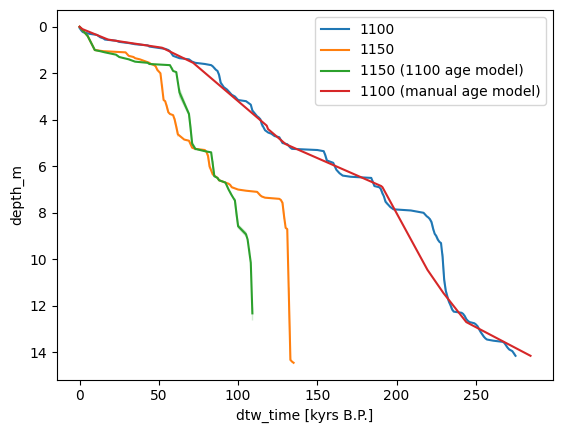

In [256]:
fig, ax = plt.subplots(1,1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df3, label='1100')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df4, label='1150')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df2, label='1150 (1100 age model)')
sns.lineplot(ax=ax, x='time', y='depth_m', data=old_model_1100, label='1100 (manual age model)')
ax.invert_yaxis()

In [257]:
fig.savefig('../out/time-depth-model.svg')